# Properties Modeling - Random Forest

1. Feature Selection and Preprocessing.
2. Random Forest Modeling.
3. Model evaluation.
4. Importance of features

In [21]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.metrics import mean_absolute_error,  mean_squared_error,  r2_score
warnings.filterwarnings("ignore")

Read the data

In [22]:
# Read data
df  = pd.read_csv('../data/curated/property_final.csv')

In [23]:
data = df.drop(['address','LOC_NAME','LOC_PID','postcode','cloest station','cloest school'],axis=1)
data = data.iloc[:,1:13]

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14725 entries, 0 to 14724
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  14725 non-null  object 
 1   station_distance      14725 non-null  float64
 2   school_distance       14725 non-null  float64
 3   CBD_distance          14725 non-null  float64
 4   cost                  14725 non-null  float64
 5   beds                  14725 non-null  int64  
 6   bath                  14725 non-null  int64  
 7   parking               14725 non-null  int64  
 8   suburb_population     14725 non-null  float64
 9   density               14725 non-null  float64
 10  offence_count_scaled  14725 non-null  float64
 11  2022_income           14725 non-null  float64
dtypes: float64(8), int64(3), object(1)
memory usage: 1.3+ MB


In [25]:
# Descriptive statistical analysis
data.describe()

,station_distance,school_distance,CBD_distance,cost,beds,bath,parking,suburb_population,density,offence_count_scaled,2022_income
count,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000
mean,5327.451493,1050.079386,39685.520619,514.531702,2.592869,1.473752,1.343565,21491.270123,3498.964719,0.193150,59850.627625
std,21216.747908,1561.004634,66704.996074,273.818889,1.043871,0.607115,0.949589,15877.699271,3152.231668,0.145679,9832.025046
min,10.060000,0.000000,562.430000,1.000000,0.000000,0.000000,0.000000,305.083333,1.575472,0.000102,33492.142460
25%,845.930000,487.830000,7713.480000,385.000000,2.000000,1.000000,1.000000,10405.217391,1379.410527,0.099453,53761.161153
50%,1582.990000,754.570000,17006.350000,450.000000,3.000000,1.000000,1.000000,16887.163068,2728.087165,0.146133,59682.718266
75%,3133.870000,1135.560000,38126.760000,560.000000,3.000000,2.000000,2.000000,28312.440000,4335.181821,0.238650,66628.287834
max,250677.940000,48080.760000,547292.750000,5600.000000,9.000000,8.000000,9.000000,69437.181818,16912.733621,1.825052,84739.514398


Feature Preprocessing

In [26]:
# Data type conversion
dummies_type =pd.get_dummies(data['type'],prefix='type')

# Merge the original variable with the new transformed variable
data_new =pd.concat([data, dummies_type],axis=1)
data_new.head()

,type,station_distance,school_distance,CBD_distance,cost,beds,bath,parking,suburb_population,density,...,type_House,type_New Apartments / Off the Plan,type_New House & Land,type_Penthouse,type_Rural,type_Semi-Detached,type_Studio,type_Terrace,type_Townhouse,type_Villa
0,Apartment / Unit / Flat,1803.65,667.06,1702.19,1800.0,3,2,2,64537.612413,9902.586904,...,0,0,0,0,0,0,0,0,0,0
1,Apartment / Unit / Flat,371.68,352.49,2267.13,480.0,1,1,1,64537.612413,9902.586904,...,0,0,0,0,0,0,0,0,0,0
2,Apartment / Unit / Flat,248.50,401.73,1937.39,400.0,1,1,0,64537.612413,9902.586904,...,0,0,0,0,0,0,0,0,0,0
3,Apartment / Unit / Flat,404.26,586.61,790.13,420.0,1,1,0,64537.612413,9902.586904,...,0,0,0,0,0,0,0,0,0,0
4,Apartment / Unit / Flat,525.08,779.91,1657.95,350.0,1,1,0,64537.612413,9902.586904,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Remove the original categorical variables
data_new.drop(['type']  ,axis=1,inplace=True)

Random forest modeling

In [28]:
# The label selection
x= data_new.drop(['cost'],axis=1)
y= data_new['cost']

# Partition of training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)   

In [29]:
y_test.shape   # Number of samples in the test set

(2945,)

In [30]:
from sklearn.preprocessing import StandardScaler  
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [31]:
# Algorithm fit
from sklearn.ensemble import   RandomForestRegressor
rf_model = RandomForestRegressor(random_state=12345 )   # Random Forest algorithm

# Fit the model and make predictions
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
y_pred1 = rf_model.predict(x_train)

Model Evaluation

In [32]:
# Calculate metrics
from sklearn.metrics import mean_absolute_error,  mean_squared_error,  r2_score
# For the training set:
print('train\nMae: ', mean_absolute_error(y_train,y_pred1))
print('Mse: ',       mean_squared_error(y_train,y_pred1))
print('r2: ',       r2_score(y_train,y_pred1))
Mape = np.mean(np.abs((y_pred1-y_train)/y_train))     
print('Mape: ',"%.5f%%" % (Mape * 100))  
print('accuracy: ',"%.5f%%" % ((1-Mape) * 100))  

# Test set:
print('test\nMae: ', mean_absolute_error(y_test,y_pred))
print('Mse: ',       mean_squared_error(y_test,y_pred))
print('r2: ',        r2_score(y_test,y_pred))
Mape = np.mean(np.abs((y_pred-y_test)/y_test))     
print('Mape: ',"%.5f%%" % (Mape * 100))
print('accuracy: ',"%.5f%%" % ((1-Mape) * 100))

train
Mae:  32.48102774700692
Mse:  5621.551930834056
r2:  0.9282178068294156
Mape:  8.24266%
accuracy:  91.75734%
test
Mae:  78.12042678494458
Mse:  25094.06142552693
r2:  0.5925110565177731
Mape:  15.35436%
accuracy:  84.64564%


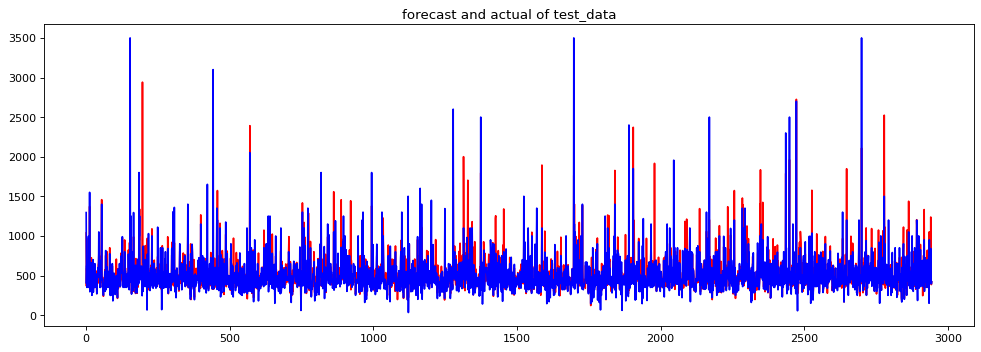

In [33]:
# Plot of deviation between predicted and actual values of the test data

plt.figure(figsize=(15,5), dpi=80)   # Set the size and pixels of the drawing area
plt.plot(range(2945),y_pred,color='r')
plt.plot(range(2945),y_test,color='b')
plt.title('forecast and actual of test_data')  # Add the title
plt.savefig("../plots/RF_forecast_actual.jpeg", bbox_inches='tight')
plt.show()

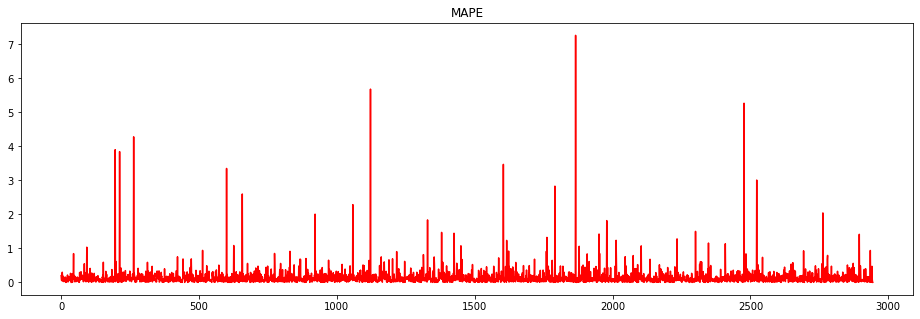

In [34]:
# Mape diagram of the test data
plt.figure(figsize=(16,5))  
plt.plot(range(2945),np.abs((y_pred-y_test)/y_test) ,color='r',linestyle='-')
plt.title('MAPE')
plt.savefig("../plots/RF_MAPE.jpeg", bbox_inches='tight')
plt.show()

Importance of features

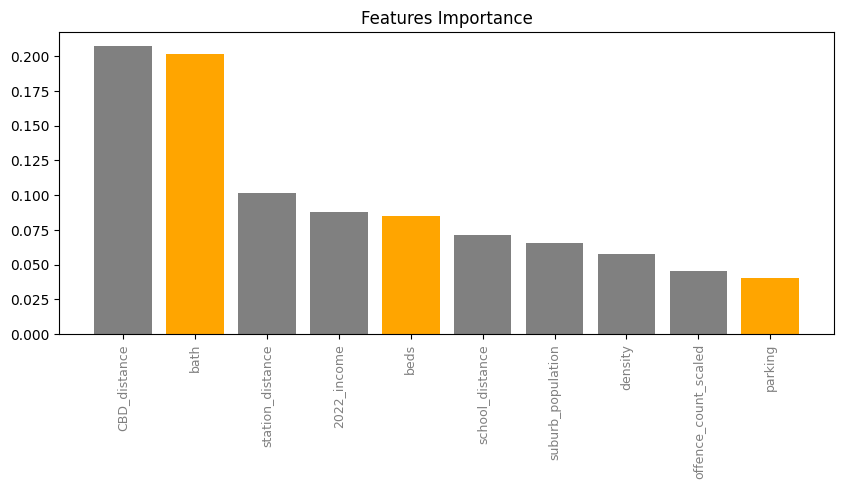

In [41]:
# polt the features importance
feature_names=x.columns
features_importances = rf_model.feature_importances_
features_importance_pairs = [(feature_name, features_importance) for feature_name, features_importance in
                             zip(feature_names, features_importances)]
features_importance_pairs

# Sort the features inside
features_importance_pairs = sorted(features_importance_pairs, key=lambda x: x[1], reverse=True)
features_importance_pairs
features_importance_name = [name[0] for name in features_importance_pairs]
features_importance_val = [name[1] for name in features_importance_pairs]

features_importance_name = features_importance_name[0:10]
features_importance_val =  features_importance_val[0:10]

# Set the bars for external factors to blue and for internal factors to red
figure = plt.figure(figsize=(10,4),dpi=100)
color_backup = [ 'gray','orange','gray','gray','orange','gray','gray','gray','gray','orange','orange','orange','orange','orange','orange']
plt.bar(range(len(features_importance_name)), features_importance_val,color=color_backup )
plt.xticks(range(len(features_importance_name)), features_importance_name)
plt.xticks(rotation=90,color='gray',fontsize=9) # Set the scale direction

plt.title('Features Importance')
plt.savefig("../plots/RF_feature_importance.jpeg", bbox_inches='tight')
plt.show()